In [85]:
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI
import PIL.Image
from dotenv import load_dotenv
load_dotenv()

True

In [86]:
import os
os.environ["GOOGLE_API_KEY"] = os.getenv("GOOGLE_API_KEY")

In [87]:
from pdf2image import convert_from_path
import os

# Function to convert PDF to images and save them
def pdf_to_images(pdf_path):
    # Convert PDF to images
    images = convert_from_path(pdf_path)
    output_folder = 'artifacts/'
    os.makedirs(output_folder, exist_ok= True)
    # Ensure the output folder exists
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Save each image
    for i, image in enumerate(images):
        image_path = os.path.join(output_folder, f"page_{i + 1}.png")  # Save as PNG
        image.save(image_path, "PNG")  # You can change "PNG" to "JPEG" if needed
        # print(f"Saved: {image_path}")
        return image_path

In [88]:
import base64
import mimetypes
import shutil

# Function to convert image to base64
def image_to_base64(path):
    _, extension = os.path.splitext(path)
    if extension == ".pdf":
        image_path = pdf_to_images(path)
    else: 
        image_path = path
        shutil.copy(image_path, "artifacts/")
    mime_type, _ = mimetypes.guess_type(image_path)
    with open(image_path, "rb") as image_file:
        base64_string = base64.b64encode(image_file.read()).decode("utf-8")
    base64_image = f"data:{mime_type};base64,{base64_string}"
    return base64_image

In [89]:
def generate_response(base64_path, input_prompt):
    llm = ChatGoogleGenerativeAI(model= "gemini-1.5-flash", temperature= 0.8)
    extracted_inforamtion = HumanMessage(
    content=[
        {
            "type": "text",
            "text": input_prompt,
        },  # You can optionally provide text parts
        {"type": "image_url", "image_url": image_to_base64(base64_path)},
    ]
)
    response = llm.invoke([extracted_inforamtion])
    return response.content

In [90]:
llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash", temperature=0.8)

In [91]:
INPUT = """
You are an expert in understanding invoices.
You will receive input images as invoices &
You will have to extract the following information
Please extract important information from invoice, such as:
    - Name
    - Date
    - Description
    - Total Amount
    - etc
    
    Respond with a JSON structure like this:
    {{
      "company_name": "<company_name>",
      "date": "<date>",
      "description": "<description>",
      "amount": "<amount>"
      "ETC" : "<etc>"
    }}
    """


In [92]:
path = "../Asus_bill.jpeg"

In [94]:
response = generate_response(path, INPUT)

In [95]:
print(response)

```json
{
  "company_name": "Dreamscape Technologies",
  "date": "13-Jun-2022",
  "description": "ASUS NB FX507ZM-HF068WS\nN3NRCX13V355136\nJASJ\nBAGPACK",
  "amount": "1,44,300.00",
  "invoice_no": "GT1189",
  "mode_of_payment": "SHOP SE 74300\nOther Reference(s)\nCARD 19000 CASH 51000",
  "buyer": "DHRUV SAXENA\nJAIPUR",
  "buyer_state": "Rajasthan, Code : 08",
  "total_amount_words": "INR One Lakh Forty Four Thousand Three Hundred Only",
  "tax_amount_words": "INR Twenty Two Thousand Eleven and Eighty Six paise Only"
}
```


## Convert PDF to Image

In [41]:


# Example Usage
# pdf_path = '../bill.pdf'


# pdf_to_images(pdf_path)


In [65]:
image_path

'../Asus_bill.jpeg'

In [1]:
import os

In [7]:
_ , extension = os.path.splitext("bill.pdf")

In [14]:
import base64
import mimetypes

In [42]:
def image(path):

    _, extension = os.path.splitext(path)
    if extension.lower() == ".pdf":
        image_path = pdf_to_images(path)
        return image_path
    else:
        pass

In [43]:
image_to_base64("../bill.pdf")

artifacts/page_1.png


''
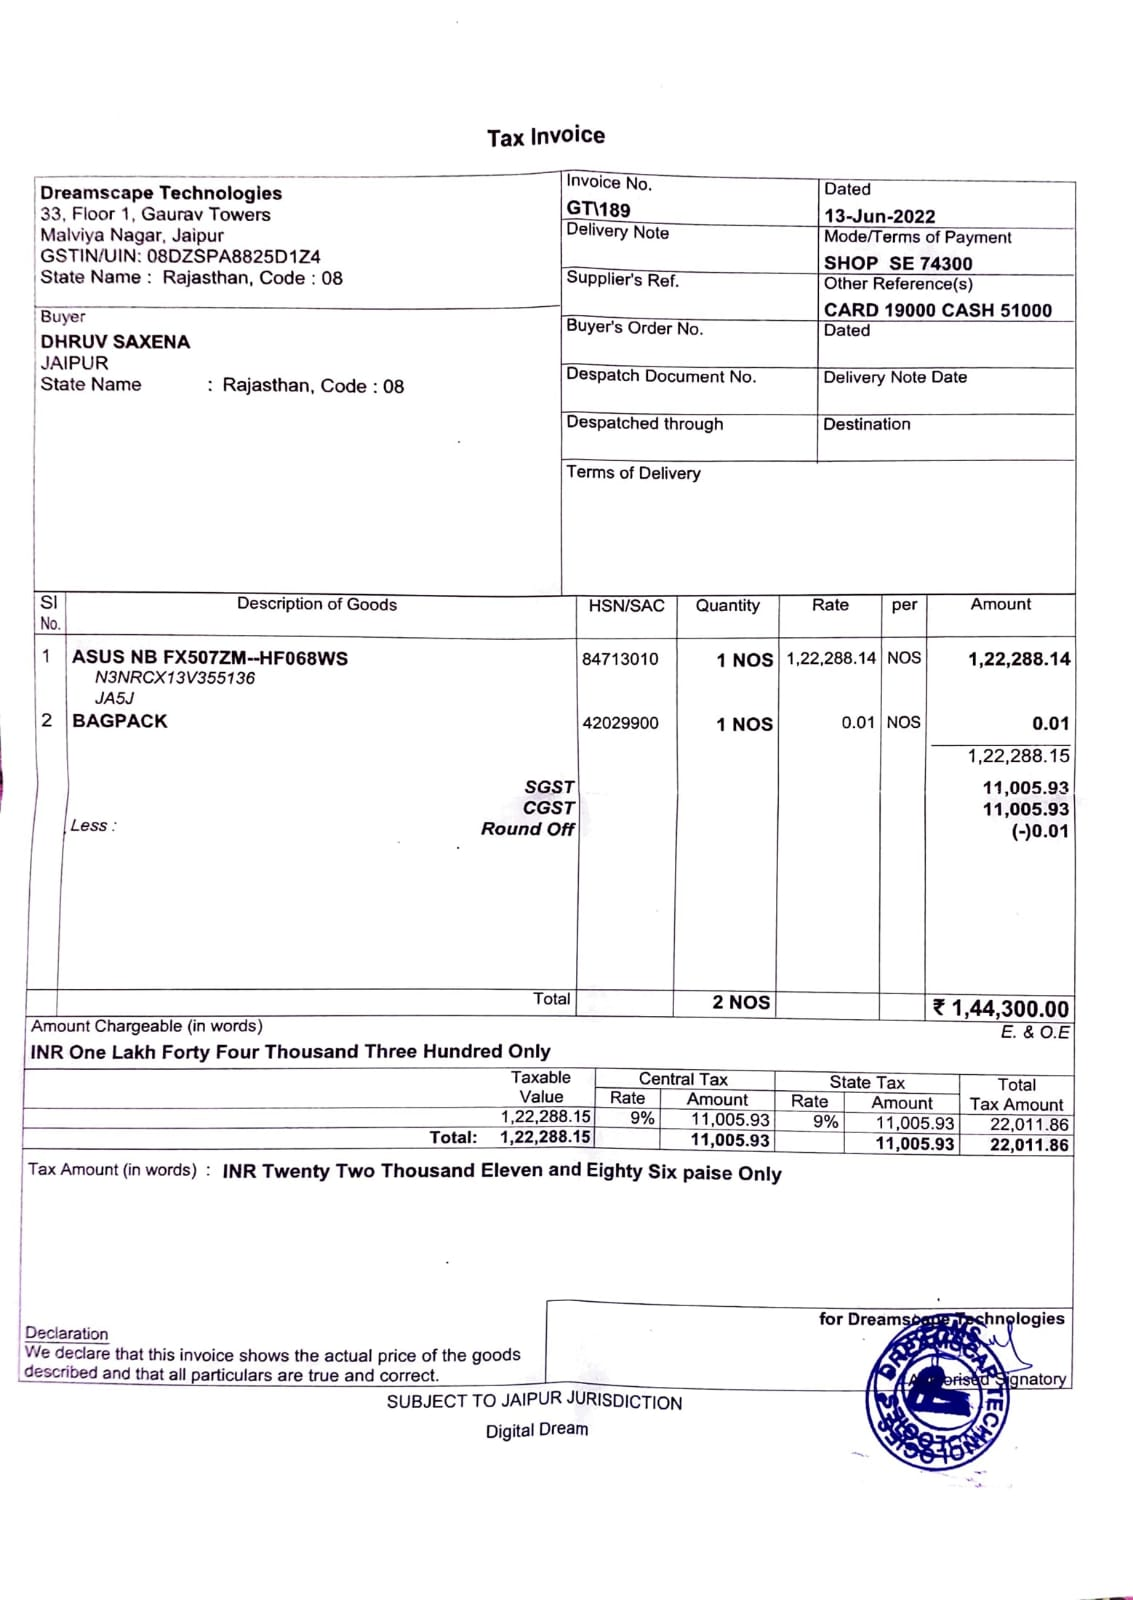

In [49]:
image_to_base64("../Asus_bill.jpeg")

In [20]:
def sourcepath(path):
    _, extenstion = os.path.splitext(path)
    if extension == ".pdf":
        image_path = pdf_to_images(pdf_path)
    

        